<a href="https://colab.research.google.com/github/ferdouszislam/pytorch-practice/blob/main/pytorch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import torch
import numpy as np

In [102]:
if torch.cuda.is_available():
  print('GPU, yay!')
else:
  print('CPU :(')

CPU :(


# Tutorial 02 - Tensor Basics

In [103]:
x = torch.rand(3,3)
y = torch.rand(3,3)

In [104]:
print(x, '\n', y, '\n')

tensor([[0.2429, 0.4869, 0.6601],
        [0.4873, 0.6931, 0.3529],
        [0.1914, 0.5219, 0.5159]]) 
 tensor([[0.7332, 0.0484, 0.8020],
        [0.9021, 0.8039, 0.4301],
        [0.5350, 0.0076, 0.7921]]) 



In [105]:
z = torch.add(x, y)
z

tensor([[0.9762, 0.5353, 1.4621],
        [1.3894, 1.4970, 0.7830],
        [0.7264, 0.5295, 1.3080]])

In [106]:
z = torch.mul(x, y)
z 

tensor([[0.1781, 0.0236, 0.5294],
        [0.4396, 0.5572, 0.1518],
        [0.1024, 0.0040, 0.4086]])

In [107]:
z.add_(y) # same as z+=y

tensor([[0.9114, 0.0720, 1.3314],
        [1.3418, 1.3611, 0.5819],
        [0.6374, 0.0116, 1.2007]])

In [108]:
z[:, 2] # get all rows at column 2 (0 based indexing)

tensor([1.3314, 0.5819, 1.2007])

In [109]:
z[1,2].item() # get single element value

0.581874430179596

In [110]:
'''
input- a pytorch tensor variable 
returns- multiplication of the input tensor's dimensions 
'''
def get_flat_shape(tensor):
  dims=list(tensor.size())
  flat_dim = 1
  for dim in dims:
    flat_dim*=dim
  return flat_dim

In [111]:
get_flat_shape(z)

9

In [112]:
flat_z = z.view(get_flat_shape(z)) # resizing a tensor
flat_z

tensor([0.9114, 0.0720, 1.3314, 1.3418, 1.3611, 0.5819, 0.6374, 0.0116, 1.2007])

In [113]:
# tensor to numpy array conversion
np_z = flat_z.clone().numpy() # using '.clone()' is a MUST
np_z

array([0.91138047, 0.07199942, 1.3314435 , 1.3417524 , 1.3611152 ,
       0.58187443, 0.6374462 , 0.01155822, 1.2006778 ], dtype=float32)

In [114]:
# numpy array to tensor conversion
flat_z = torch.from_numpy(np_z.copy()) # using '.copy()' is a MUST
flat_z

tensor([0.9114, 0.0720, 1.3314, 1.3418, 1.3611, 0.5819, 0.6374, 0.0116, 1.2007])

  
  **Tensors can be kept into GPU but numpy arrays have to remain on CPU. GPUs are generally faster.**  


In [115]:
device = False
if torch.cuda.is_available():
  device = torch.device("cuda")

In [116]:
# all operations on tensors to be done in GPU
# x = torch.rand(2, 2).to(device)
# y = torch.rand(2, 2).to(device)
# z=x+y

# print(x, '\n', y, '\n', z)

In [117]:
# numpy arrays MUST be on cpu
z = z.to('cpu')
np_z = z.clone().numpy()
np_z

array([[0.91138047, 0.07199942, 1.3314435 ],
       [1.3417524 , 1.3611152 , 0.58187443],
       [0.6374462 , 0.01155822, 1.2006778 ]], dtype=float32)

# Tutorial 03 - Gradient Calculation with Autograd

In [118]:
x = torch.randn(3, requires_grad=True)
x

tensor([-0.4545,  1.2116, -2.0397], requires_grad=True)

In [119]:
y=x+2
print(y)
z=y*y*2
print(z)
z = z.mean()
print(z) 

tensor([ 1.5455,  3.2116, -0.0397], grad_fn=<AddBackward0>)
tensor([4.7774e+00, 2.0629e+01, 3.1444e-03], grad_fn=<MulBackward0>)
tensor(8.4698, grad_fn=<MeanBackward0>)


In [120]:
# calculating dz/dx for each element of x tensor (in this case- x1,x2,x3)
#  N.B- All but the last call to backward should have the retain_graph=True option
z.backward(retain_graph=True)
print(x.grad)

tensor([ 2.0607,  4.2821, -0.0529])


In [121]:
# prevent gradient tracking 
# (might be needed when updating weights during training)

x = torch.randn(3, requires_grad=True)
print(x)

# way 1
print('way 1')
y=x
y.requires_grad_(False)
print(x)

# way 2
print('way 2')
y=x.detach()
print(y)

# way 3
print('way 3')
y=x+2
print(x, '\n', y)
with torch.no_grad():
  y=x+2
  print(x, '\n', y)

tensor([ 0.3457, -0.2724,  1.1655], requires_grad=True)
way 1
tensor([ 0.3457, -0.2724,  1.1655])
way 2
tensor([ 0.3457, -0.2724,  1.1655])
way 3
tensor([ 0.3457, -0.2724,  1.1655]) 
 tensor([2.3457, 1.7276, 3.1655])
tensor([ 0.3457, -0.2724,  1.1655]) 
 tensor([2.3457, 1.7276, 3.1655])


In [122]:
# dummy training example with some weights

weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum() # loss function... probably
  
  model_output.backward()
  print(weights.grad)

  # before next iteration or optimization step MUST empty the gradient
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Tutorial 04 - Back Propagation

In [123]:
# example backpropagation for a single instance

x = torch.tensor(1.0) # input
y = torch.tensor(2.0) # actual output

w = torch.tensor(1.0, requires_grad=True) # weight i.e, learnable parameter

# forward pass
y_hat = w*x # y_hat is the prediction using linear model = w*x 
loss = (y_hat - y)**2 # loss function = squared error (generally this would be MSE)

print(loss)

# backward pass
loss.backward()
print(w.grad)

# now update weight using the gradient 
# and do forward and backward pass again

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Tutorial 05 - Gradient Descent with Autograd & Backpropagation



In [124]:
# implementing linear regression from scratch with dummy data

# f = w*x, for the example model below- w = 2 fits the ouput completely 
X = np.array([1,2,3,4], dtype=np.float32) # input
Y = np.array([2,4,6,8], dtype=np.float32) # actual output

# randomely initializing weight
w = 0.0

# model prediction
def forward(x):
  return w*x

# loss function, MSE
def loss(y, y_pred):
  return ((y_pred-y)**2).mean()

# gradient
# here, loss, J = 1/N * (w*x-y)^2 [because y_pred = w*x]
# therefore, dJ/dw = 1/N*2*x*(w*x-y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred-y).mean()

print(f'Prediction before training for x=5 : {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 5

print('\n[Training started...]\n')
for epoch in range(n_iters):
  # prediction, forward pass
  y_pred = forward(X)

  # loss
  J = loss(Y, y_pred)

  # gradient
  dJ_dw = gradient(X, Y, y_pred)

  # update weights
  w = w - learning_rate* dJ_dw 

  # print everytime
  if epoch%1==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {J:.8f}')
print('\n[Training finished...]\n')

print(f'Prediction after training for x=5 : {forward(5):.3f}')

Prediction before training for x=5 : 0.000

[Training started...]

epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083

[Training finished...]

Prediction after training for x=5 : 9.898


### Now let's do the same using Autograd for backward pass

In [125]:
# implementing linear regression from scratch with dummy data

# f = w*x, for the example model below- w = 2 fits the ouput completely 
X = torch.tensor([1,2,3,4], dtype=torch.float32) # input
Y = torch.tensor([2,4,6,8], dtype=torch.float32) # actual output

# randomely initializing weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w*x

# loss function, MSE
def loss(y, y_pred):
  return ((y_pred-y)**2).mean()

# gradient
# here, loss, J = 1/N * (w*x-y)^2 [because y_pred = w*x]
# therefore, dJ/dw = 1/N*2*x*(w*x-y)
# def gradient(x, y, y_pred):
#   return np.dot(2*x, y_pred-y).mean()

print(f'Prediction before training for x=5 : {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

print('\n[Training started...]\n')
for epoch in range(n_iters):
  # prediction i.e forward pass
  y_pred = forward(X)

  # loss
  J = loss(Y, y_pred)

  # calculate gradient i.e backward pass
  #dJ_dw = gradient(X, Y, y_pred)
  J.backward() # dJ/dw

  # update weights
  #w = w - learning_rate* dJ_dw 
  w.data = w.data - learning_rate * w.grad
  # alternately we can do this,
  # with torch.no_grad(): 
  #   # update to weight should not be tracked for calculating gradient
  #   w -= learning_rate*w.grad

  w.grad.zero_() # clear the gradients 

  if epoch%2==1:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {J:.8f}')
print('\n[Training finished...]\n')

print(f'Prediction after training for x=5 : {forward(5):.3f}')

Prediction before training for x=5 : 0.000

[Training started...]

epoch 2: w = 0.555, loss = 21.67499924
epoch 4: w = 0.956, loss = 11.31448650
epoch 6: w = 1.246, loss = 5.90623236
epoch 8: w = 1.455, loss = 3.08308983
epoch 10: w = 1.606, loss = 1.60939169
epoch 12: w = 1.716, loss = 0.84011245
epoch 14: w = 1.794, loss = 0.43854395
epoch 16: w = 1.851, loss = 0.22892261
epoch 18: w = 1.893, loss = 0.11949898
epoch 20: w = 1.922, loss = 0.06237914

[Training finished...]

Prediction after training for x=5 : 9.612


# Tutorial 06 - Training Pipeline: Model, Loss, and Optimizer

### Implementing Linear Regression same as before but this time with model, loss, optimizer, autograd from the **torch.nn** library

In [126]:
import torch.nn as nn

In [127]:
'''
Typical Training Pipeline

1. design model (input size, output size, forward pass)
2. Construct loss & optimizer
3. Training loop
  - forward pass: compute prediction
  - backward pass: compute gradients
  - update weights
'''
# implementing linear regression from scratch with dummy data

# f = w*x, for the example model below- w = 2 fits the ouput completely 
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32) # input
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32) # actual output

n_samples, n_features = X.shape # 4 samples each with one feature
print('# of samples =', n_samples, ' # of features =', n_features, '\n')

# define custom model (same as Linear Regression for now)
class MyLinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(MyLinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

# model = nn.Linear(in_features=n_features, out_features=1)
model = MyLinearRegression(input_dim=n_features, output_dim=1)

# test data
X_test = torch.tensor([5], dtype=torch.float32)

print(f'Prediction before training for x=5 : {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 20 
# MSE as loss function
loss = nn.MSELoss()
# optimize model with stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print('\n[Training started...]\n')
for epoch in range(n_iters):
  # prediction i.e forward pass
  y_pred = model(X)

  # loss
  J = loss(y_pred, Y)

  # calculate gradient i.e backward pass
  J.backward() # dJ/dw

  # update weights using optimizer
  optimizer.step()
  optimizer.zero_grad() # clear the gradients 

  if epoch%2==1:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {J:.3f}')
print('\n[Training finished...]\n')

print(f'Prediction after training for x=5 : {model(X_test).item():.3f}')

# of samples = 4  # of features = 1 

Prediction before training for x=5 : 2.243

[Training started...]

epoch 2: w = 1.038, loss = 14.105
epoch 4: w = 1.351, loss = 6.794
epoch 6: w = 1.568, loss = 3.274
epoch 8: w = 1.719, loss = 1.579
epoch 10: w = 1.823, loss = 0.763
epoch 12: w = 1.896, loss = 0.370
epoch 14: w = 1.946, loss = 0.181
epoch 16: w = 1.980, loss = 0.090
epoch 18: w = 2.004, loss = 0.046
epoch 20: w = 2.021, loss = 0.025

[Training finished...]

Prediction after training for x=5 : 9.918


# Tutorial 07 Linear Regression

In [128]:
from sklearn import datasets
import matplotlib.pyplot as plt

epoch-10, loss = 1271.0977
weight - Parameter containing:
tensor([[14.0005]], requires_grad=True)
bias - Parameter containing:
tensor([-0.3902], requires_grad=True)

epoch-20, loss = 805.0642
weight - Parameter containing:
tensor([[23.3680]], requires_grad=True)
bias - Parameter containing:
tensor([-0.4648], requires_grad=True)

epoch-30, loss = 567.0027
weight - Parameter containing:
tensor([[30.0620]], requires_grad=True)
bias - Parameter containing:
tensor([-0.2359], requires_grad=True)

epoch-40, loss = 444.5781
weight - Parameter containing:
tensor([[34.8539]], requires_grad=True)
bias - Parameter containing:
tensor([0.1153], requires_grad=True)

epoch-50, loss = 381.2599
weight - Parameter containing:
tensor([[38.2897]], requires_grad=True)
bias - Parameter containing:
tensor([0.4914], requires_grad=True)

epoch-60, loss = 348.3536
weight - Parameter containing:
tensor([[40.7570]], requires_grad=True)
bias - Parameter containing:
tensor([0.8438], requires_grad=True)

epoch-70, lo

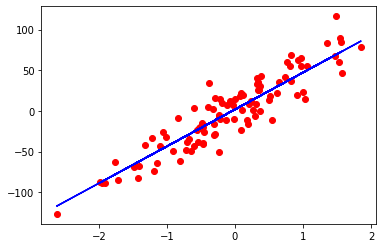

In [134]:
# step-0 prepare data
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
 
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))

y = y.view(y.shape[0], 1) # convert y to row=n_samples and col=1

n_samples, n_features = X.shape

# step-1 model
model = nn.Linear(in_features=n_features, out_features=1)

# step-2 loss & optimizer
learning_rate = 0.02
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# step-3 training loop
n_iters = 100
for epoch in range(n_iters):
  # forward pass
  y_pred = model(X)

  # loss
  J = loss(y_pred, y)

  # back prop
  J.backward()

  # update weights
  optimizer.step()
  # clear grad
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f'epoch-{epoch+1}, loss = {J.item():.4f}')
    for name, param in model.named_parameters():
      print(name, '-', param)
    print()

# prediction
y_pred = model(X).detach()

# plot
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_pred.numpy(), 'b')
plt.show()

# Tutorial 08 Logistic Regression

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [143]:
# step-0 prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# convert single row with multiple columns to multiple rows single colums
y_train = y_train.view(y_train.shape[0], 1)

# step-1 model setup

# logistic regression, f = w*x+b and apply sigmoid at the end
class MyLogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(MyLogisticRegression, self).__init__()
    self.linear = nn.Linear(in_features=n_input_features, out_features=1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = MyLogisticRegression(n_features)

# step-2 loss & optimizer
learning_rate = 0.01
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# step-3 training loop
n_iters = 100
for epoch in range(n_iters):
  # forward pass
  y_pred = model(X_train)

  # loss 
  J = loss(y_pred, y_train)

  # backward pass
  J.backward()

  # weight updates
  optimizer.step()
  # clear grads
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f'epoch {epoch+1}: loss = {J.item():.4f}')
    # for name, param in model.named_parameters():
    #   print(name, '-', param)

with torch.no_grad():
  y_pred = model(X_test)
  cls_pred = y_pred.round() # if y_pred>=0.5 class = 1, else class = 0
  test_acc = cls_pred.eq(y_test).sum() / float(y_test.shape[0])
  print(f'\ntest accuracy = {test_acc:.3f}')

epoch 10: loss = 0.4691
epoch 20: loss = 0.4023
epoch 30: loss = 0.3574
epoch 40: loss = 0.3251
epoch 50: loss = 0.3006
epoch 60: loss = 0.2813
epoch 70: loss = 0.2656
epoch 80: loss = 0.2526
epoch 90: loss = 0.2415
epoch 100: loss = 0.2321

test accuracy = 60.439
